In [ ]:
import cv2
import math
import numpy as np
from google.colab.patches import cv2_imshow

line = сначала колонки, затем строки

In [ ]:
def print_images(images):
  img_size = 250
  resized_images = [cv2.resize(img, (img_size, img_size)) for img in images]
  vis = np.concatenate(resized_images, axis=1)
  cv2_imshow(vis)

# Выбрать изображение не менее 1000х800 пикселей (px).

In [ ]:
!curl https://masterpiecer-images.s3.yandex.net/5fd531dca6427c7:upscaled > /content/image.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  145k  100  145k    0     0  67304      0  0:00:02  0:00:02 --:--:-- 67309


1024 1024


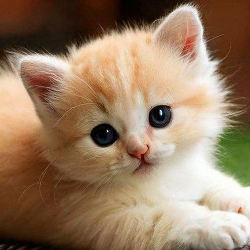

In [ ]:
image = cv2.imread('/content/image.png')
rows, columns = image.shape[:2]
print(rows, columns)
print_images([image])

# Применить к изображению самостоятельно придуманные Евклидовы преобразования для смещения, вращения изображения.

Cмещение изображения

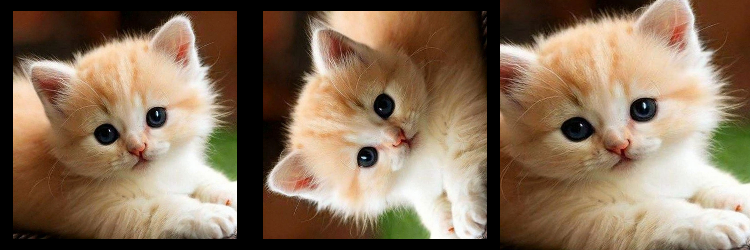

In [ ]:
img1 = cv2.warpAffine(image, np.float32([[1, 0, 60], [0, 1, 50]]), (rows + 120, columns + 100))
img2 = cv2.warpAffine(image, np.float32([[0, 1, 60], [1, 0, 50]]), (rows + 120, columns + 100))
img5 = cv2.warpAffine(image, np.float32([[1, 0, -160], [0, 1, -50]]), (rows - 160, columns - 50))
print_images([img1, img2, img5])

# cv2_imshow(img5)
# cv2_imshow(image)

Вращение изображения

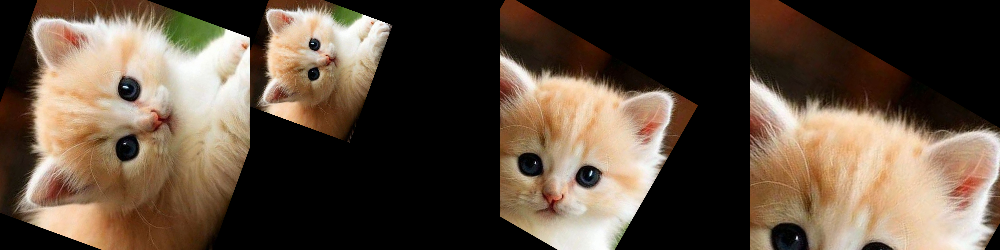

In [ ]:
R = cv2.getRotationMatrix2D((columns / 2, rows / 2), 70, 1)
rot1 = cv2.warpAffine(image, R, (columns, rows))
rot2 = cv2.warpAffine(image, R, (columns * 2, rows * 2))

R = cv2.getRotationMatrix2D((50, 50), -30, 1)
crop_image = image[0:800, 0:900]
rot3 = cv2.warpAffine(crop_image, R, (columns, rows))

R = cv2.getRotationMatrix2D((50, 50), -30, 1.5)
rot4 = cv2.warpAffine(crop_image, R, (rows, columns))

print_images([rot1, rot2, rot3, rot4])

# Применить к каждому пункту не менее 2 преобразований:

    • Изменить форму изображения произвольным аффинным (не Евклидовым) преобразованием.
    • Изменить форму изображения произвольным проективным преобразованием.
    • Применить деформацию (image warping) к изображению.

Произвольное аффинное преобразование

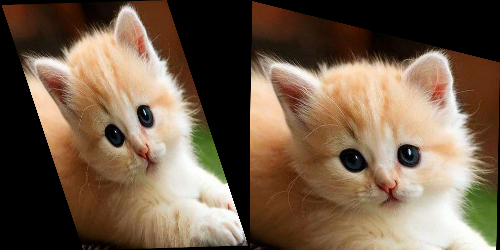

In [ ]:
src_points = np.float32([[0, 0], [columns -1 , 0], [0, rows - 1]])
dst_points = np.float32([[10, 10], [columns - 1, 0], [columns / 2, rows / 2]])
affine_matrix = cv2.getAffineTransform(src_points, dst_points)
aff1 = cv2.warpAffine(image, affine_matrix, (int(columns * 1.5), int(rows / 2)))

src_points = np.float32([[0, 0], [columns -1 , 0], [0, rows / 2]])
dst_points = np.float32([[10, 10], [columns - 1, rows / 2], [0, rows - 1]])
affine_matrix = cv2.getAffineTransform(src_points, dst_points)
aff2 = cv2.warpAffine(image, affine_matrix, (columns, int(rows * 2)))

print_images([aff1, aff2])

Произвольное проективное преобразование

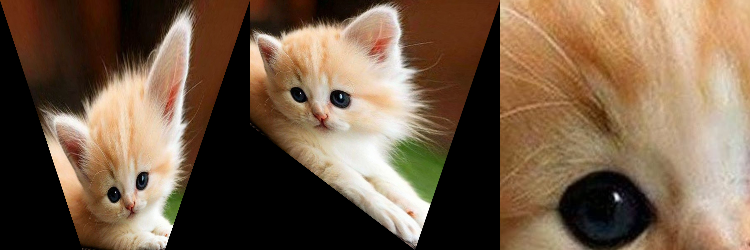

In [ ]:
src_points = np.float32([[0, 0], [columns -1 , 0], [0, rows - 1], [columns - 1, rows - 1]])
dst_points = np.float32([[0, 0], [columns - 1, 0], [int(columns * 0.33), rows - 1], [int(columns * 0.66), rows - 1]])
affine_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
aff1 = cv2.warpPerspective(image, affine_matrix, (columns, rows))

src_points = np.float32([[0, 0], [columns -1 , 0], [0, rows - 1], [columns - 1, rows - 1]])
dst_points = np.float32([[0, 0], [columns - 1, 0], [0, int(rows / 2)], [int(columns * 0.66), rows - 1]])
affine_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
aff2 = cv2.warpPerspective(image, affine_matrix, (columns, rows))

src_points = np.float32([[300, 300], [600, 300], [300, 600], [600, 600]])
dst_points = np.float32([[0, 0], [columns - 1 , 0], [0, rows - 1], [columns - 1, rows - 1]])
affine_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
aff3 = cv2.warpPerspective(image, affine_matrix, (columns, rows))

print_images([aff1, aff2, aff3])

Деформация изображения

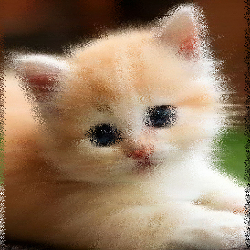

In [ ]:
img_output = np.zeros(image.shape, dtype=image.dtype)
for i in range(rows):
  for j in range(columns):
    offset_x = int(25.0 * math.sin(2 * math.pi * i / 180 * (i * 2 + j * 5)))
    offset_y = 0
    if i + offset_y < rows and j + offset_x < columns:
        img_output[i, j] = image[(i + offset_y) % rows, (j + offset_x) % columns]
    else:
        img_output[i, j] = 0
print_images([img_output])

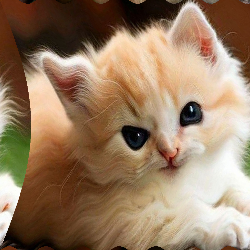

In [ ]:
img_output = np.zeros(image.shape, dtype=image.dtype)
for i in range(rows):
  for j in range(columns):
    offset_x = int(128.0 * math.sin(2 * 3.14 * i / (-2 * columns)))
    offset_y = int(16.0 * math.sin(2 * 3.14 * j / 150))
    if j + offset_x < columns:
      img_output[i,j] = image[(i + offset_y) % rows, (j + offset_x) % columns]
    else:
      img_output[i,j] = 0
print_images([img_output])

# Разделить изображение на части и изменить каждую:

Исходное изображение условно разделить на четыре одинаковых части. В одной части обнулить любой из цветовых каналов (B, G, R). Вторую часть перевернуть (развернуть на 180 град). Цветовые каналы пикселей третьей части должны содержать сумму цветовых каналов пикселей третьей и четвертой частей изображения. На четвертую часть вставить прямоугольные фрагменты из трех предыдущих частей, не менее одного фрагмента из каждой части. Полученное изображение поместить в самостоятельно выбранную рамку.

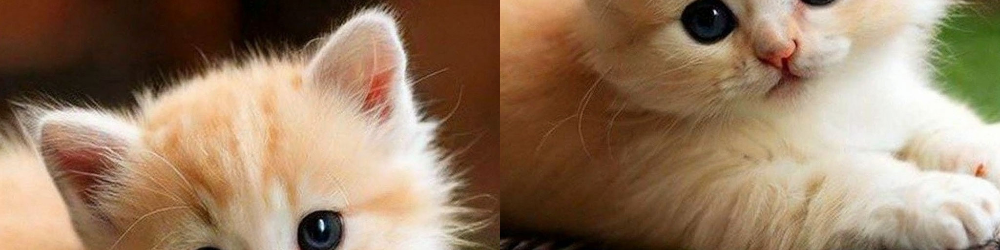

In [ ]:
tl = image[0:columns // 2, 0:rows // 2]
tr = image[0:columns // 2, rows // 2:rows]
bl = image[columns // 2:columns, 0:rows // 2]
br = image[columns // 2:columns, rows // 2:rows]
print_images([tl, tr, bl, br])

Зануляем цветовой канал верхней левой части изображения

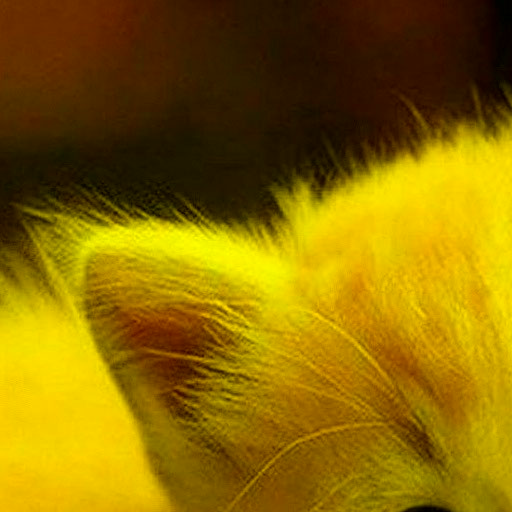

In [ ]:
(b, g, r) = cv2.split(tl)
zeros_b = np.full(b.shape, 0, dtype=b.dtype)
tl = cv2.merge([zeros_b, g, r])
cv2_imshow(tl)

Поворот на 180 град верхней правой части

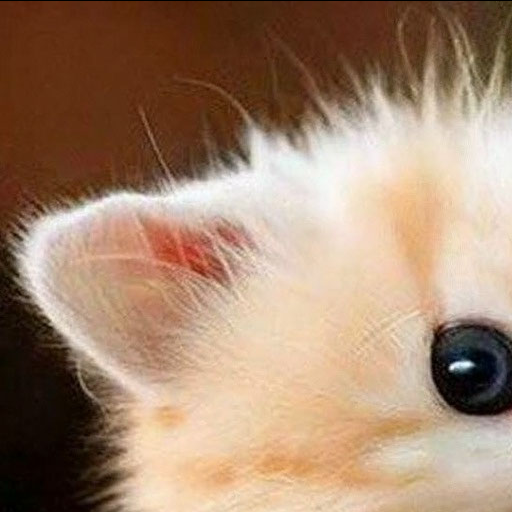

In [ ]:
R = cv2.getRotationMatrix2D((tr.shape[0] // 2, tr.shape[1] // 2), 90, 1)
tr = cv2.warpAffine(tr, R, (tr.shape[0], tr.shape[1]))
cv2_imshow(tr)

Cумма каналов 3 и 4 изображения для третьего изображения

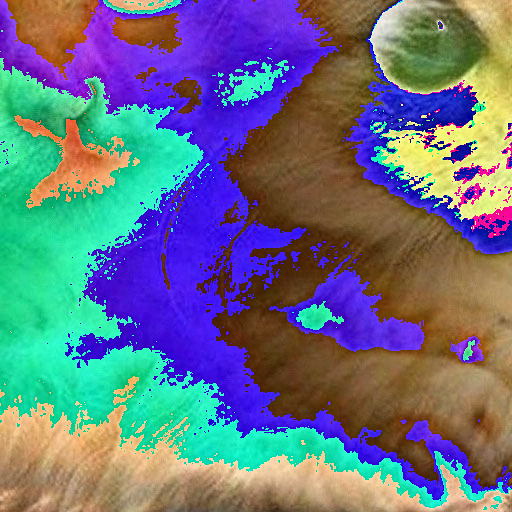

In [ ]:
(lb, lg, lr) = cv2.split(bl)
(rb, rg, rr) = cv2.split(br)
new_b = lb + rb
new_g = lg + rg
new_r = lr + rr
bl = cv2.merge([new_b, new_g, new_r])
cv2_imshow(bl)

Вставка прямоугольных фрагментов четвертого изображения

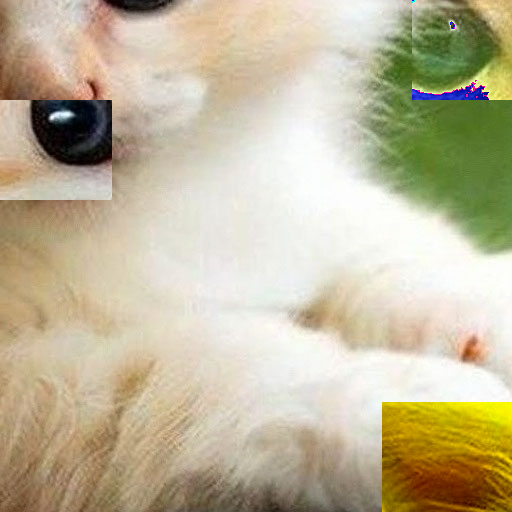

In [ ]:
tl_fragment = tl[250:360, 100:230]
br[br.shape[0] - tl_fragment.shape[0]: br.shape[0], br.shape[1] - tl_fragment.shape[1]:br.shape[1]] = tl_fragment

tr_fragment = tr[350:450, 400:512]
br[100:100 + tr_fragment.shape[0], 0:tr_fragment.shape[1]] = tr_fragment

bl_fragment = bl[0:100, 400:500]
br[0:bl_fragment.shape[0], br.shape[1] - bl_fragment.shape[1]:br.shape[1]] = bl_fragment

cv2_imshow(br)

Объединение изображения

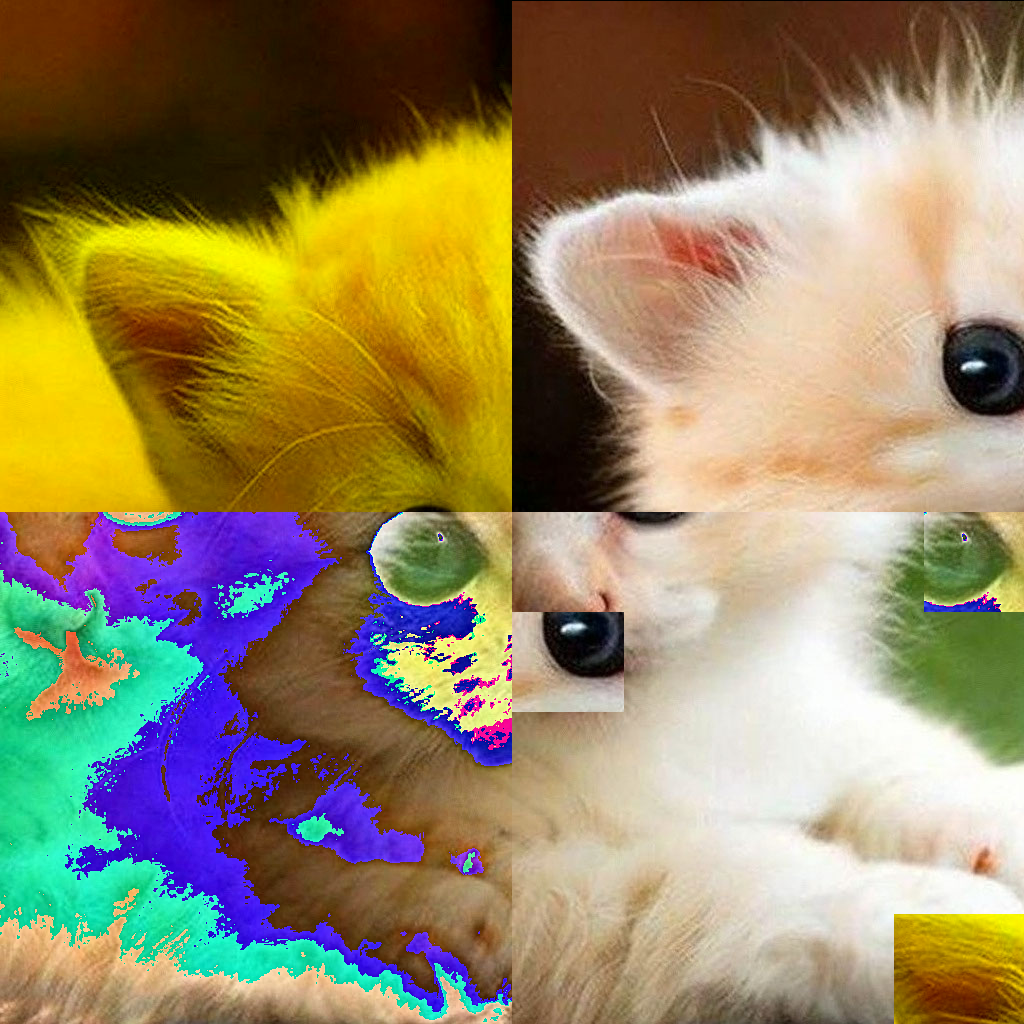

In [ ]:
full_image = np.copy(image)
full_image[0:rows // 2, 0:columns // 2] = tl
full_image[0:rows // 2, columns // 2:columns] = tr
full_image[rows // 2:rows, 0:columns // 2] = bl
full_image[rows // 2:rows, columns // 2:columns] = br
cv2_imshow(full_image)

# Рисование и написание текста на изображении

Используя хотя бы раз каждую из функций rectangle, polylines, circle, ellipse, putText, нарисовать и подписать какое-либо животное или выдуманный персонаж. Полученное изображение вставить на другую картинку так, чтобы были видны оба изображения. Сохраните полученное изображение для следующих лабораторных работ.

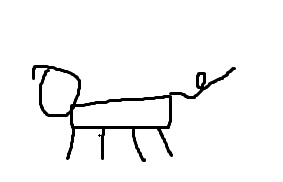

In [ ]:
canvas = np.zeros((300, 300, 3), dtype=np.uint8)

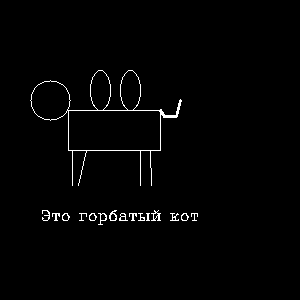

In [ ]:
canvas = np.zeros((300, 300, 3), dtype=np.uint8)
cv2.circle(canvas, (50, 100), 20, color=(255, 255, 255))
cv2.rectangle(canvas, (68, 110), (160, 150), color=(255, 255, 255))

cv2.line(canvas, (72, 150), (72, 185), color=(255, 255, 255))
cv2.line(canvas, (86, 150), (78, 185), color=(255, 255, 255))
cv2.line(canvas, (140, 150), (140, 185), color=(255, 255, 255))
cv2.line(canvas, (150, 150), (151, 185), color=(255, 255, 255))

cv2.ellipse(canvas, (100, 90), (20, 10), 90, 0, 360, color=(255, 255, 255))
cv2.ellipse(canvas, (130, 90), (20, 10), 90, 0, 360, color=(255, 255, 255))

pts = np.array([[160, 110], [164, 116], [176, 116], [180, 100]])
cv2.polylines(canvas, [pts], isClosed=False, color=(255, 255, 255), thickness=2)
cv2.putText(canvas, 'Это горбатый кот', (40, 220), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5,color=(255, 255, 255))

cv2_imshow(canvas)

In [ ]:
full_image[0:500, 0:500] = canvas
cv2_imshow(full_image)

ValueError: could not broadcast input array from shape (300,300,3) into shape (500,500,3)

In [ ]:
from google.colab import files
cv2.imwrite('/content/masterpiece.png', canvas)
files.download('/content/masterpiece.png')